SOLVING DATASET USING DATA AUGMENTATION AND REGULARIZATION CNN MODEL

Import Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
print('Importing successfully done')

Importing successfully done


Load and Preprocess the CIFAR-100 Dataset

In [2]:
# Load CIFAR-100 dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

In [3]:
#Summarize the dataset:

#The CIFAR-100 dataset is a widely used benchmark for image classification tasks in machine learning. 
#The dataset consists of 60,000 color images, each of size 32x32 pixels. 
#These images are divided into 50,000 training images and 10,000 test images.
#There are 100 different classes in CIFAR-100, each containing 600 images. 
#The classes are mutually exclusive, meaning each image belongs to one and only one class.
#The 100 classes are grouped into 20 superclasses. Each superclass contains five related classes. 
#For eg; the superclass "vehicles 1" includes classes such as bicycle, bus, motorcycle, pickup truck, and train.
#Each image in the dataset comes with a fine label (one of the 100 classes) and a coarse label (one of the 20 superclasses).
#The CIFAR-100 dataset is used to train and evaluate machine learning models, particularly for tasks related to image recognition and classification.

PRE-PROCESSING THE DATASET:-

In [4]:
# Print the shape of the data

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


DISPLAY IMAGES TO VERIFY THE DATA:-

In [5]:
# CIFAR-100, display of labels

cifar100_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
                   'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
                   'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
                   'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 
                   'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 
                   'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 
                   'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                   'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
                   'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 
                   'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

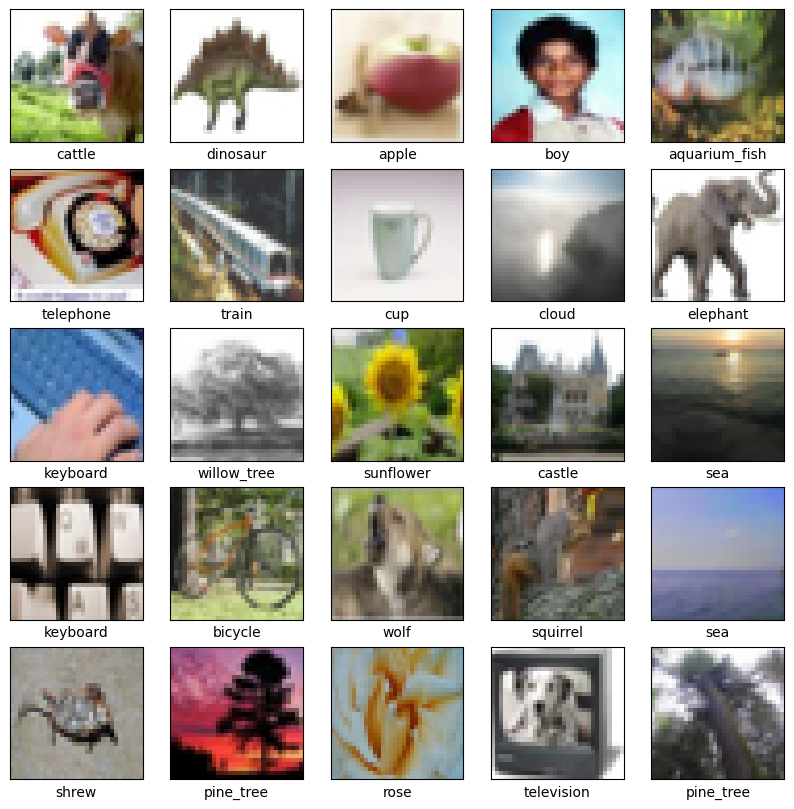

In [6]:
# Function to plot images

def plot_images(images, labels, classes, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i][0]])
    plt.show()
    
# Plot some training images

plot_images(train_images, train_labels, cifar100_labels)

FEATURE SCALING OF THE DATA :-

In [7]:
# Normalize pixel values to be between 0 and 1

train_images, test_images = train_images / 255.0, test_images / 255.0

Data Augmentation

In [8]:
# We import additional libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('Importing successfully done')

Importing successfully done


In [9]:
# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)


Load the Model(CNN)

In [10]:
# We import additional libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
print('Importing successfully done')

Importing successfully done


In [11]:
# Build the model

model = Sequential()
model

<Sequential name=sequential, built=False>

Build an Improved CNN Model

In [12]:
# Convolutional Layer 1 
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
       
# Convolutional Layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# Convolutional Layer 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))   

C:\Users\torne\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
# Flatten the results to feed into a dense layer

model.add(layers.Flatten())

In [14]:
# Fully connected layer

model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

In [15]:
# Output layer

model.add(layers.Dense(100, activation='softmax'))  # CIFAR-100 has 100 classes

Compile the Model

In [16]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │              

 Total params: 1,333,924 (5.09 MB)

 Trainable params: 1,331,108 (5.08 MB)

 Non-trainable params: 2,816 (11.00 KB)

Train the Model with Data Augmentation

In [18]:
# Train the model

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    steps_per_epoch=len(train_images) // 64, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50


C:\Users\torne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 494s 600ms/step - accuracy: 0.0454 - loss: 4.9137 - val_accuracy: 0.1238 - val_loss: 3.7599
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:35 430ms/step - accuracy: 0.0469 - loss: 4.0148

C:\Users\torne\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.0469 - loss: 2.0100 - val_accuracy: 0.1249 - val_loss: 3.7589
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 461s 590ms/step - accuracy: 0.1242 - loss: 3.8225 - val_accuracy: 0.2176 - val_loss: 3.2017
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.2031 - loss: 1.7004 - val_accuracy: 0.2205 - val_loss: 3.1819
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 456s 583ms/step - accuracy: 0.1819 - loss: 3.3893 - val_accuracy: 0.1894 - val_loss: 3.4504
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2812 - loss: 1.4885 - val_accuracy: 0.1768 - val_loss: 3.5378
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 458s 587ms/step - accuracy: 0.2340 - loss: 3.0810 - val_accuracy: 0.2716 - val_loss: 2.8596
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.2969 - loss: 1.4085 - val_accuracy: 0.2734 - val_loss: 2.8511
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 476s 610ms/step - accuracy: 0.2762 - loss: 2.8487 - val

In [19]:
# Accuracy score:

val_accuracy = np.max(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 52.82%


Evaluate the Model

In [20]:
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 19s - 61ms/step - accuracy: 0.5209 - loss: 1.7362
Test accuracy: 0.52


Plot Training History

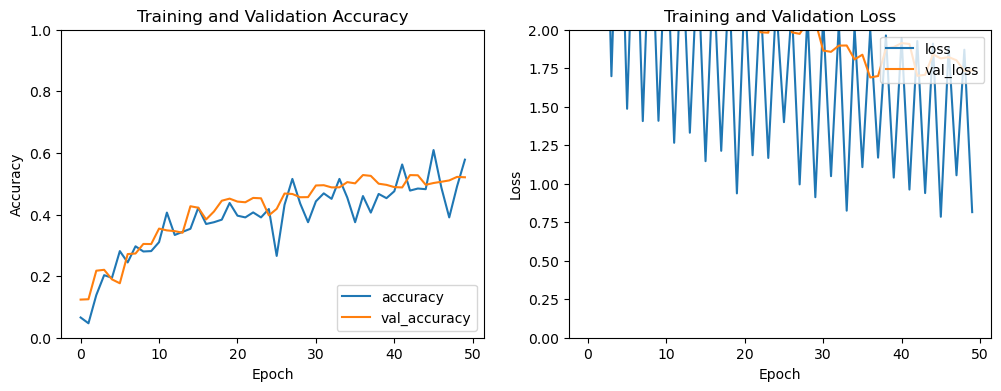

In [21]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

NOTE:- 
    
Accuracy will vary as per the changes made to the CNN model. Following are the ways to achieve better accuracy for CIFAR-100 dataset.

-Basic CNN without optimization: ~40-50% accuracy.

-CNN with data augmentation and regularization: ~50-60% accuracy.

-Deeper CNN architectures (e.g., ResNet, DenseNet) with data augmentation and regularization: ~60-70% accuracy.

-Transfer learning with pre-trained models (e.g., ResNet50, EfficientNet): ~70-80% accuracy.

In [22]:
# RESULTS:
# The observed validation accuracy is 52.82%
# The accuracy for the testing data is observed to be 52%
# The best Epoch at which the above accuracy is obtained is 37th cycle.